Task III: Do the Exercises at the end of the Chapter 7. 

        a. All created ipynb files. 
        b. A docs/pdf file that includes detailed screenshots and description for each screenshot.       


In [1]:
# Setup

import stock_analysis
from datetime import datetime
from stock_analysis.utils import group_stocks, describe_group


start_date = datetime.strptime('2019-01-01', '%Y-%m-%d').date()
end_date = datetime.strptime('2020-12-31', '%Y-%m-%d').date()
reader = stock_analysis.StockReader(start_date, end_date)

# get faang data
fb, aapl, amzn, nflx, goog = (
    reader.get_ticker_data(ticker)
    for ticker in ['META', 'AAPL', 'AMZN', 'NFLX', 'GOOG']
)

# get S&P 500 data
sp = reader.get_index_data('S&P 500')

# get bitcoin data in USD
bitcoin = reader.get_bitcoin_data('USD')

faang = group_stocks(
    {
        'Facebook': fb, 
        'Apple': aapl, 
        'Amazon': amzn, 
        'Netflix': nflx, 
        'Google': goog
    }
)

faang_sp = group_stocks(
    {
        'Facebook': fb, 
        'Apple': aapl, 
        'Amazon': amzn, 
        'Netflix': nflx, 
        'Google': goog,
        'S&P 500': sp
    }
)

all_assets = group_stocks(
    {
        'Bitcoin': bitcoin,
        'S&P 500': sp,
        'Facebook': fb, 
        'Apple': aapl, 
        'Amazon': amzn, 
        'Netflix': nflx, 
        'Google': goog
    }
)

TypeError: string indices must be integers

1. Using the StockAnalyzer and StockVisualizer classes, calculate and plot 
three levels of support and resistance for Netflix's closing price.

In [3]:
# Exercise 1

%matplotlib inline
import matplotlib.pyplot as plt

netflix_viz = stock_analysis.StockVisualizer(nflx)

NameError: name 'nflx' is not defined

2. With the StockVisualizer class, look at the effect of after-hours trading on the FAANG stocks:\
a) As individual stocks \
b) As a portfolio using the make_portfolio() function from the stock_analysis.utils module

In [ ]:
# Exercise 2 A

netflix_viz.after_hours_trades()

faang_viz = stock_analysis.AssetGroupVisualizer(faang)
faang_viz.after_hours_trades()

In [ ]:
# Exercise 2 B

# def make_portfolio(data, date_level='date'):
#  """
#  Make a portfolio of assets by grouping by date and 
#  summing all columns.
#  Note: the caller is responsible for making sure the 
#  dates line up across assets and handling when they don't.
#  """
#  return data.groupby(level=date_level).sum()

from stock_analysis.utils import make_portfolio

stock_analysis.StockVisualizer(make_portfolio(faang)).after_hours_trades()

3. Using the StockVisualizer.open_to_close() method, create a plot that fills the area between the FAANG stocks' opening price (as a portfolio) and its closing price each day in red if the price declined and in green if the price increased. As a bonus, do the same for a portfolio of bitcoin and the S&P 500.

In [ ]:
# Exercise 3

# def open_to_close(self, figsize=(10, 4)):
#  """
#  Visualize the daily change in price from open to close.
#  Parameters:
#  - figsize: (width, height) of plotExploratory data analysis 429
#  Returns:
#  A matplotlib `Axes` object.
#  """
#  ax = self.fill_between(
#  self.data.open, self.data.close, 
#  figsize=figsize, legend_x=0.67,
#  title='Daily price change (open to close)',
#  label_higher='price rose', label_lower='price fell'
#  )
#  ax.set_ylabel('price')
#  return ax

4. Mutual funds and exchange-traded funds (ETFs) are funds that are composed of many assets. They are built to mitigate risk, so volatility for the fund will be lower than that of the assets that compose it. (Information on how they differ can be found at https://www.investopedia.com/articles/exchangetradedfunds/08/etf-mutual-fund-difference.asp.) Compare a mutual fund or ETF of your choice to three of its largest stocks (by composition) using annualized volatility and the AssetGroupAnalyzer class.

In [ ]:
# Exercise 4

5. Write a function that returns a dataframe of one row with columns for alpha, beta, sharpe_ratio, annualized_volatility, is_bear_market, and is_bull_market, which each contain the results of running the respective methods on a given stock using the StockAnalyzer class. Dictionary comprehensions and the getattr() function, as used in the AssetGroupAnalyzer.analyze() method, will be useful.

In [ ]:
# Exercise 5

6. With the StockModeler class, build an ARIMA model fit on the S&P 500 data from January 1, 2019 through November 30, 2020 and use it to predict the performance in December 2020. Be sure to examine the residuals and compare the predicted performance to the actual performance

In [ ]:
# Exercise 6
from pandas.plotting import autocorrelation_plot

sp = reader.get_index_data('S&P 500')

train, test = sp['2019':'2020-11'], sp.loc['2020-12']
# We can use ARIMA to model the performance with autoregressive (AR), differences or lagged data (I), 
# and moving average (MA) terms. The autocorrelation plot can help find a good starting point for this:
autocorrelation_plot(train.close)

%%capture
# this takes a long time to run, so we will start with a smaller AR of 10
arima_model = StockModeler.arima(train, ar=10, i=1, ma=5)

# AR = 10, I = 1, MA = 5
print(arima_model.summary())

StockModeler.plot_residuals(arima_model)

7. Request an API key for AlphaVantage (https://www.alphavantage.co/support/#api-key) and collect the daily foreign exchange rate from USD to JPY using the get_forex_rates() method on the same StockReader object you created to collect the data for the previous exercises. Build a candlestick plot with the data from February 2019 through January 2020, resampled to 1-week intervals. Hint: take a look at the slice() function from the standard library (https://docs.python.org/3/library/functions.html#slice) in order to provide the date range

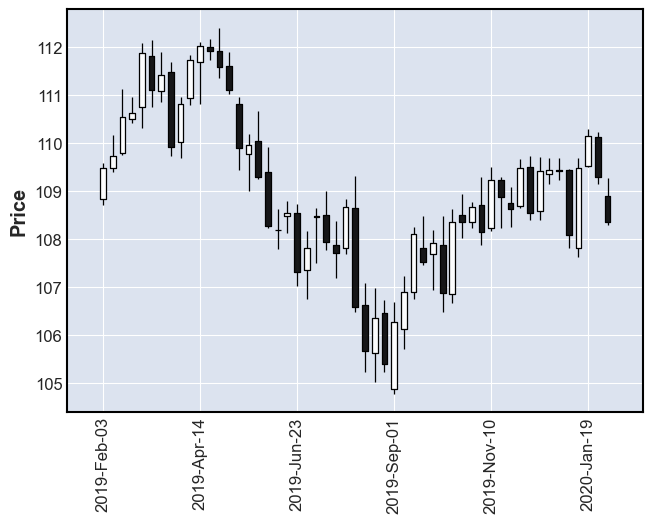

In [6]:
# Exercise 7

# ~\AppData\Roaming\Python\Python39\site-packages\stock_analysis\stock_reader.py
# def get_forex_rates(self, from_currency, to_currency, **kwargs):
#         """
#         Get daily foreign exchange rates from AlphaVantage.

#         Note: This requires an API key, which can be obtained for free at
#         https://www.alphavantage.co/support/#api-key. To use this method, you must either
#         store it as an environment variable called `ALPHAVANTAGE_API_KEY` or pass it in to
#         this method as `api_key`.

#         Parameters:
#             - from_currency: The currency you want the exchange rates for.
#             - to_currency: The target currency.

#         Returns:
#             A `pandas.DataFrame` with daily exchange rates.
#         """
#         data = web.DataReader(
#             f'{from_currency}/{to_currency}', 'av-forex-daily',
#             start=self.start, end=self.end, **kwargs
#         ).rename(pd.to_datetime)
#         data.index.rename('date', inplace=True)
#         return data

APY_KEY='REMOVED'
forex = reader.get_forex_rates('USD', 'JPY', api_key=APY_KEY)
stock_analysis.StockVisualizer(forex).candlestick(date_range=slice('2019-02-01', '2020-01-31'), 
                                                  xrotation=90,
                                                  resample='1W')